In [ ]:
#################################### A2C Agent #####################################

In [1]:
import gym
from a2c import A2CAgent 
import time

# Create Gym environment
env = gym.make("CartPole-v1")

# Check agent class for initialization parameters and initialize agent
gamma = 0.9
lr = 1e-3

agent = A2CAgent(env, gamma, lr)

# Define training parameters
max_episodes = 500
max_steps = 500

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    trajectory = []
    state = env.reset()
    episode_reward = 0
    for step in range(max_steps):
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        trajectory.append((state, action, reward, next_state, done))
        episode_reward += reward  
        if done or step == max_steps:
            episode_rewards.append(episode_reward)
            print("Episode " + str(episode) + ": " + str(episode_reward))
            break
        state = next_state
    agent.update(trajectory, 0)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
a2c_rewards = episode_rewards
a2c_runtime = run_time

Episode 0: 15.0
Episode 1: 12.0
Episode 2: 21.0
Episode 3: 26.0
Episode 4: 34.0
Episode 5: 16.0
Episode 6: 35.0
Episode 7: 39.0
Episode 8: 22.0
Episode 9: 66.0
Episode 10: 14.0
Episode 11: 30.0
Episode 12: 16.0
Episode 13: 51.0
Episode 14: 12.0
Episode 15: 100.0
Episode 16: 36.0
Episode 17: 37.0
Episode 18: 25.0
Episode 19: 21.0
Episode 20: 63.0
Episode 21: 20.0
Episode 22: 52.0
Episode 23: 49.0
Episode 24: 29.0
Episode 25: 50.0
Episode 26: 25.0
Episode 27: 35.0
Episode 28: 35.0
Episode 29: 23.0
Episode 30: 23.0
Episode 31: 77.0
Episode 32: 98.0
Episode 33: 26.0
Episode 34: 22.0
Episode 35: 33.0
Episode 36: 58.0
Episode 37: 17.0
Episode 38: 109.0
Episode 39: 15.0
Episode 40: 61.0
Episode 41: 48.0
Episode 42: 20.0
Episode 43: 30.0
Episode 44: 26.0
Episode 45: 27.0
Episode 46: 29.0
Episode 47: 21.0
Episode 48: 48.0
Episode 49: 52.0
Episode 50: 104.0
Episode 51: 27.0
Episode 52: 53.0
Episode 53: 70.0
Episode 54: 64.0
Episode 55: 47.0
Episode 56: 100.0
Episode 57: 28.0
Episode 58: 44.0
Epi

Episode 451: 155.0
Episode 452: 179.0
Episode 453: 152.0
Episode 454: 262.0
Episode 455: 314.0
Episode 456: 189.0
Episode 457: 201.0
Episode 458: 191.0
Episode 459: 246.0
Episode 460: 184.0
Episode 461: 130.0
Episode 462: 164.0
Episode 463: 72.0
Episode 464: 159.0
Episode 465: 249.0
Episode 466: 126.0
Episode 467: 138.0
Episode 468: 192.0
Episode 469: 266.0
Episode 470: 85.0
Episode 471: 167.0
Episode 472: 176.0
Episode 473: 196.0
Episode 474: 149.0
Episode 475: 236.0
Episode 476: 153.0
Episode 477: 156.0
Episode 478: 221.0
Episode 479: 165.0
Episode 480: 133.0
Episode 481: 70.0
Episode 482: 139.0
Episode 483: 294.0
Episode 484: 116.0
Episode 485: 183.0
Episode 486: 159.0
Episode 487: 141.0
Episode 488: 136.0
Episode 489: 130.0
Episode 490: 166.0
Episode 491: 123.0
Episode 492: 142.0
Episode 493: 170.0
Episode 494: 79.0
Episode 495: 103.0
Episode 496: 197.0
Episode 497: 154.0
Episode 498: 120.0
Episode 499: 192.0


In [ ]:
##################################### DR TRPO Agent (KL) #####################################

In [2]:
import gym
from a2c_dr_trpo import DRTRPOAgent1  
import time

# Create Gym environment
env = gym.make("CartPole-v1")

# Check agent class for initialization parameters and initialize agent
gamma = 0.9
lr = 1e-3

agent = DRTRPOAgent1(env, gamma, lr)


############################### MC Updates  (Full Episode) ###############################

# Define training parameters
max_episodes = 800
max_steps = 500

episode_rewards = []
run_time = []
start_time = time.time()
for episode in range(max_episodes):
    first_state = env.reset()
    state_adv = []
    total_value_loss = 0
    
    episode_reward = 0
    # loop through the first action
    for i in range(env.action_space.n):
        env.reset()
        state = first_state
        action = i
        trajectory = []
        
        for step in range(max_steps):
            if step != 0:
                action = agent.get_action(state)
            next_state, reward, done, _ = env.step(action)
            trajectory.append((state, action, reward, next_state, done))
            episode_reward += reward  
            if done or step == max_steps-1:
                break
            state = next_state
            
        adv, value_loss = agent.compute_adv_first_sa(trajectory)
        state_adv.append(adv)
        total_value_loss += value_loss
        
    policy_loss = agent.compute_policy_loss(state, state_adv)
    agent.update(value_loss, policy_loss)
    elapse = time.time() - start_time
    run_time.append(elapse)
    
    episode_rewards.append(episode_reward/env.action_space.n)
    print("Episode " + str(episode) + ": " + str(episode_reward))

dr_trpo_rewards = episode_rewards
dr_trpo_runtime = run_time

Episode 0: 38.0
Episode 1: 35.0
Episode 2: 38.0
Episode 3: 41.0
Episode 4: 48.0
Episode 5: 43.0
Episode 6: 133.0
Episode 7: 47.0
Episode 8: 32.0
Episode 9: 54.0
Episode 10: 55.0
Episode 11: 29.0
Episode 12: 51.0
Episode 13: 47.0
Episode 14: 33.0
Episode 15: 108.0
Episode 16: 58.0
Episode 17: 46.0
Episode 18: 35.0
Episode 19: 61.0
Episode 20: 69.0
Episode 21: 35.0
Episode 22: 138.0
Episode 23: 59.0
Episode 24: 70.0
Episode 25: 69.0
Episode 26: 99.0
Episode 27: 43.0
Episode 28: 35.0
Episode 29: 69.0
Episode 30: 51.0
Episode 31: 117.0
Episode 32: 96.0
Episode 33: 102.0
Episode 34: 103.0
Episode 35: 32.0
Episode 36: 46.0
Episode 37: 56.0
Episode 38: 77.0
Episode 39: 46.0
Episode 40: 35.0
Episode 41: 92.0
Episode 42: 60.0
Episode 43: 111.0
Episode 44: 41.0
Episode 45: 65.0
Episode 46: 34.0
Episode 47: 80.0
Episode 48: 75.0
Episode 49: 48.0
Episode 50: 61.0
Episode 51: 121.0
Episode 52: 71.0
Episode 53: 88.0
Episode 54: 87.0
Episode 55: 98.0
Episode 56: 41.0
Episode 57: 111.0
Episode 58: 85.

Episode 450: 131.0
Episode 451: 129.0
Episode 452: 215.0
Episode 453: 93.0
Episode 454: 131.0
Episode 455: 125.0
Episode 456: 193.0
Episode 457: 72.0
Episode 458: 182.0
Episode 459: 216.0
Episode 460: 297.0
Episode 461: 198.0
Episode 462: 189.0
Episode 463: 157.0
Episode 464: 132.0
Episode 465: 261.0
Episode 466: 187.0
Episode 467: 283.0
Episode 468: 201.0
Episode 469: 118.0
Episode 470: 213.0
Episode 471: 184.0
Episode 472: 132.0
Episode 473: 216.0
Episode 474: 122.0
Episode 475: 157.0
Episode 476: 298.0
Episode 477: 89.0
Episode 478: 350.0
Episode 479: 189.0
Episode 480: 183.0
Episode 481: 121.0
Episode 482: 241.0
Episode 483: 159.0
Episode 484: 133.0
Episode 485: 151.0
Episode 486: 256.0
Episode 487: 124.0
Episode 488: 318.0
Episode 489: 264.0
Episode 490: 139.0
Episode 491: 209.0
Episode 492: 140.0
Episode 493: 127.0
Episode 494: 192.0
Episode 495: 97.0
Episode 496: 83.0
Episode 497: 119.0
Episode 498: 100.0
Episode 499: 155.0
Episode 500: 190.0
Episode 501: 209.0
Episode 502: 115.

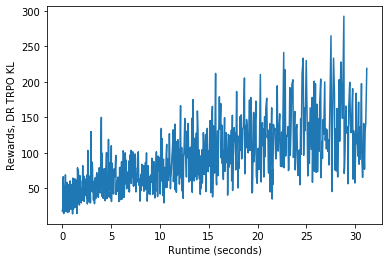

In [3]:
import matplotlib.pyplot as plt

plt.plot(dr_trpo_runtime, dr_trpo_rewards)
plt.ylabel('Rewards, DR TRPO KL')
plt.xlabel('Runtime (seconds)')
plt.show()

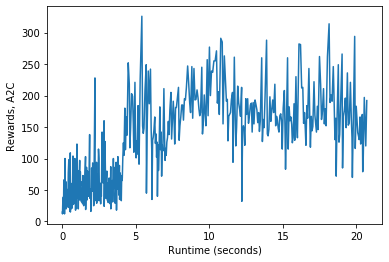

In [4]:
import matplotlib.pyplot as plt

plt.plot(a2c_runtime, a2c_rewards)
plt.ylabel('Rewards, A2C')
plt.xlabel('Runtime (seconds)')
plt.show()